<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/DiamondPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diamond Price Prediction**

# **1. Introduction**

Your client for this project is a diamond company,Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). You have to help the company in predicting the price for the stone on the bases of the details given in the dataset









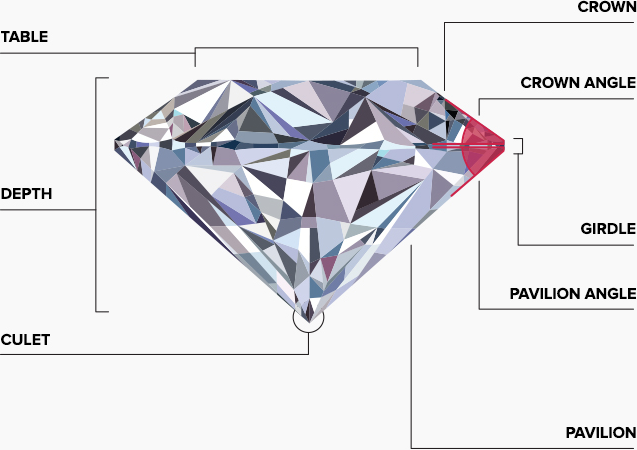

# **2. Problem Statement**
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


# **3. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

# **4. Data Acquisition & Description**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/cubic_zirconia.csv")
data.head(10)



,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [3]:
data.drop(data.columns[0],axis=1, inplace=True)
data.rename(columns={"x":"length","y":"width","z":"height"},inplace=True)
data

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   length   26967 non-null  float64
 7   width    26967 non-null  float64
 8   height   26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [5]:
data.describe()

,carat,depth,table,length,width,height,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


# **5. Data Pre-Processing**

## **5.1 Data Pre-Profiling**

### **Check null value or any other inconsistent value in column**

In [6]:
(data==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     3
width      3
height     9
price      0
dtype: int64

In [7]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

### **Check Duplicate records**

In [8]:
data.duplicated().value_counts()

False    26933
True        34
dtype: int64

### **Drop Duplicated Records**

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    26933
dtype: int64

## **5.2 Data Cleaning**

In [10]:
data.shape

(26933, 10)

### **Drop rows with "0" value in all Length , Width and Height**

In [11]:
data.drop(data[(data.length==0) | (data.width==0) | (data.height==0)].index,inplace=True)
print((data==0).sum())
print(data.shape)


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     0
width      0
height     0
price      0
dtype: int64
(26925, 10)


In [12]:
data.depth.describe()

count    26228.000000
mean        61.745573
std          1.411824
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [13]:
data.depth.describe()

count    26228.000000
mean        61.745573
std          1.411824
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [14]:
data.isna().sum()


carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

In [15]:
data.depth.describe()

count    26228.000000
mean        61.745573
std          1.411824
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

# **6. Exploratory Data Analysis**

### **Detect Outliers and distribution of numerical features**

In [16]:
data.describe()

,carat,depth,table,length,width,height,price
count,26925.000000,26228.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,61.745573,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.411824,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


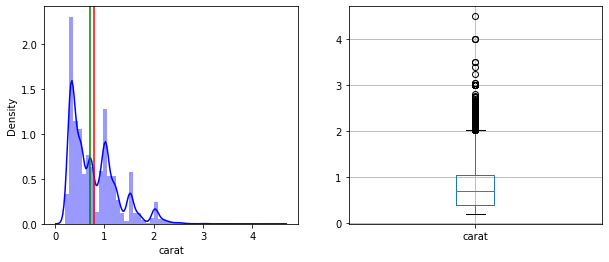

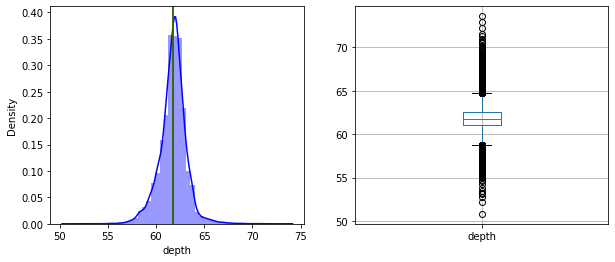

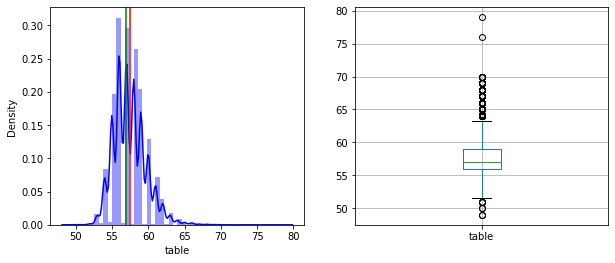

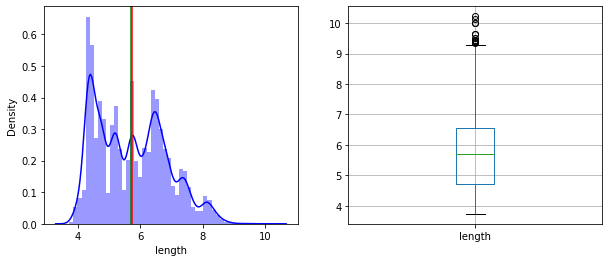

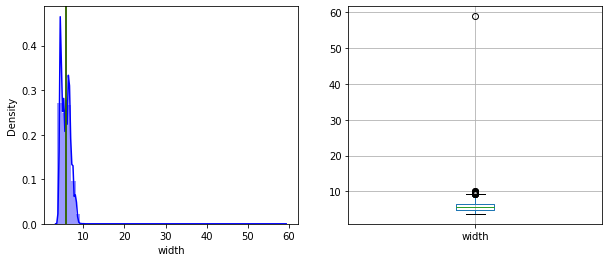

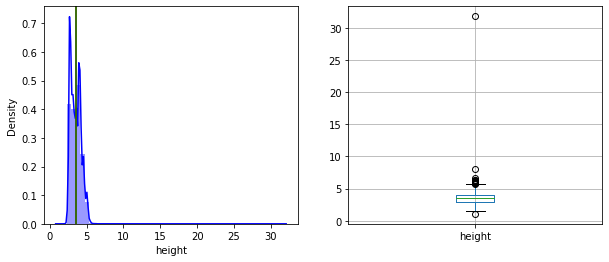

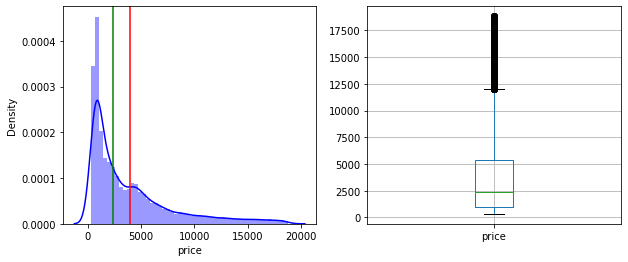

In [17]:
contCol=data.select_dtypes(np.number).columns.to_list()
for col in contCol:

  fig=plt.figure(figsize=[10,4])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  data.boxplot(column=col)



In [18]:
data[data.length>data.length.quantile(.75)].sort_values("length",ascending=False)

,carat,cut,color,clarity,depth,table,length,width,height,price
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531
20505,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223
3025,4.01,Premium,J,I1,62.5,62.0,10.02,9.94,6.24,15223
8156,4.00,Very Good,I,I1,63.3,58.0,10.01,9.94,6.31,15984
15080,3.51,Premium,J,VS2,62.5,59.0,9.66,9.63,6.03,18701
...,...,...,...,...,...,...,...,...,...,...
13134,1.09,Ideal,D,SI2,62.1,56.0,6.56,6.59,4.08,5164
9613,1.10,Very Good,H,SI1,62.5,56.0,6.56,6.63,4.12,4414
15001,1.08,Ideal,H,VS1,62.0,55.0,6.56,6.60,4.08,6562
23276,1.04,Premium,G,VS1,61.5,61.0,6.56,6.51,4.02,6814


In [19]:
data[data.width>data.width.quantile(.75)].sort_values("width",ascending=False)

,carat,cut,color,clarity,depth,table,length,width,height,price
25795,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531
20505,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223
8156,4.00,Very Good,I,I1,63.3,58.0,10.01,9.94,6.31,15984
3025,4.01,Premium,J,I1,62.5,62.0,10.02,9.94,6.24,15223
...,...,...,...,...,...,...,...,...,...,...
4427,1.01,Premium,F,VS2,59.2,61.0,6.59,6.55,3.89,6900
9598,1.04,Ideal,G,VS1,61.5,55.0,6.54,6.55,4.02,6831
26604,1.02,Ideal,H,SI2,58.8,57.0,6.61,6.55,3.87,3142
4443,1.06,Ideal,G,VVS1,61.6,57.0,6.53,6.55,4.03,8488


### **Observations**
in one record index(25795) width "58.90" looks little unrealastic, also as depth is 58.9 looks like its incorrectly captured, hence recalculating based on height and depth

In [20]:
depth=data[(data.width==58.90)].depth
print(depth)
height=data[(data.width==58.90)].height
print(height)
newWidth=(height*100)/depth
print(newWidth)
data["width"].replace([58.90], newWidth,inplace=True)
data[data.width>data.width.quantile(.75)].sort_values("width",ascending=False)

25795    58.9
Name: depth, dtype: float64
25795    8.06
Name: height, dtype: float64
25795    13.684211
dtype: float64


,carat,cut,color,clarity,depth,table,length,width,height,price
25795,2.00,Premium,H,SI2,58.9,57.0,8.09,13.684211,8.06,12210
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.160000,6.72,18531
20505,4.01,Premium,I,I1,61.0,61.0,10.14,10.100000,6.17,15223
8156,4.00,Very Good,I,I1,63.3,58.0,10.01,9.940000,6.31,15984
3025,4.01,Premium,J,I1,62.5,62.0,10.02,9.940000,6.24,15223
...,...,...,...,...,...,...,...,...,...,...
4427,1.01,Premium,F,VS2,59.2,61.0,6.59,6.550000,3.89,6900
9598,1.04,Ideal,G,VS1,61.5,55.0,6.54,6.550000,4.02,6831
26604,1.02,Ideal,H,SI2,58.8,57.0,6.61,6.550000,3.87,3142
4443,1.06,Ideal,G,VVS1,61.6,57.0,6.53,6.550000,4.03,8488


In [21]:
data[data.height>data.height.quantile(.75)].sort_values("height",ascending=False)

,carat,cut,color,clarity,depth,table,length,width,height,price
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.150000,31.80,1970
25795,2.00,Premium,H,SI2,58.9,57.0,8.09,13.684211,8.06,12210
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.160000,6.72,18531
8156,4.00,Very Good,I,I1,63.3,58.0,10.01,9.940000,6.31,15984
12758,3.40,Fair,D,I1,66.8,52.0,9.42,9.340000,6.27,15964
...,...,...,...,...,...,...,...,...,...,...
7929,1.02,Good,G,SI1,63.6,58.0,6.34,6.390000,4.05,4964
1720,1.07,Ideal,H,SI1,61.0,56.0,6.60,6.680000,4.05,5281
24245,1.06,Very Good,H,VS2,62.5,57.0,6.47,6.490000,4.05,5783
13425,1.08,Ideal,G,VS1,61.0,56.0,6.62,6.650000,4.05,7553


### **Observations**
in one record index(344) height "31. 80" looks little unrealastic, also as its ..51 carot and normal length to height ratio is between 1 to 2, the value could be 3.18 which is mistypled as 31.8, hence correcting the value

In [22]:
data["height"].replace([31.8], 3.18,inplace=True)

In [23]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

In [24]:
data[data.depth.isna()==True]

,carat,cut,color,clarity,depth,table,length,width,height,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [25]:
data.depth.describe()

count    26228.000000
mean        61.745573
std          1.411824
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

### **Calculate Depth% using length,width and height**

In [26]:
# import math
# for i in range(data.shape[0]):
#   if (math.isnan(data.iloc[i].depth)):    
#     avg=(data.iloc[i].length+data.iloc[i].width)/2
#     data.iloc[i].depth=(data.iloc[i].height/avg)*100

data['depth'] = np.where(data['depth'].isnull(),(2*data['height']*100)/(data['length']+data['width']),data['depth'] )


In [27]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     0
width      0
height     0
price      0
dtype: int64

In [28]:
data.depth.describe()

count    26925.000000
mean        61.744409
std          1.411601
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

### **Distribution of Cut, Color and Clarity**

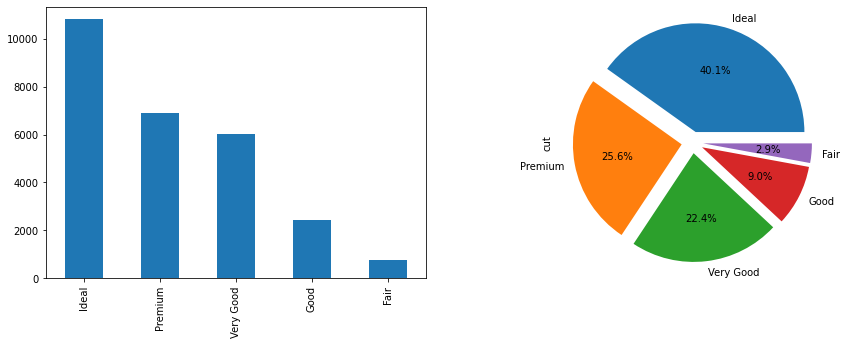

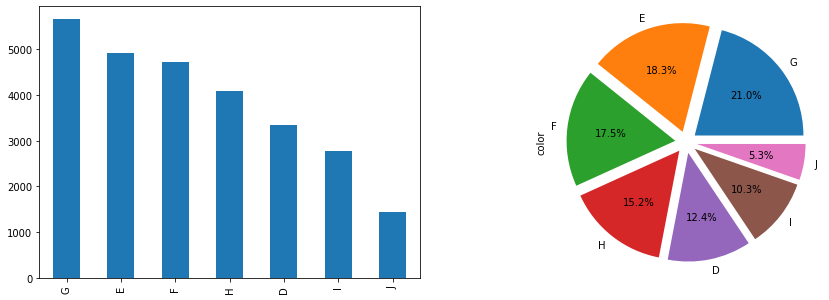

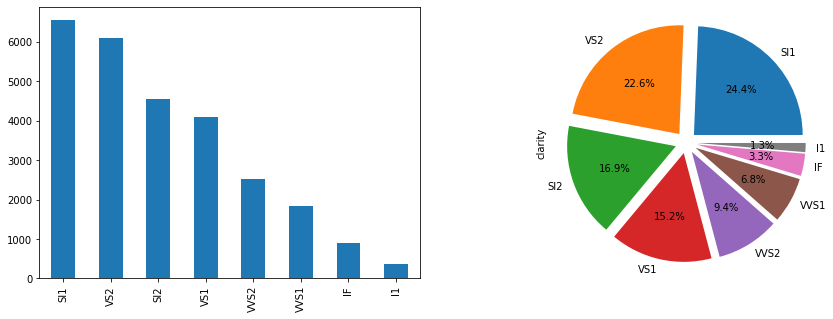

In [29]:
catCol=data.select_dtypes("object").columns.to_list()

for col in catCol:
  figure=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  data[col].value_counts().plot.bar()
  plt.subplot(1,2,2)
  data[col].value_counts().plot.pie(explode = np.ones(data[col].nunique())/10, autopct= '%3.1f%%')
  plt.show()

### **Checking relationship between input features and target variable**

In [30]:
contCol

['carat', 'depth', 'table', 'length', 'width', 'height', 'price']

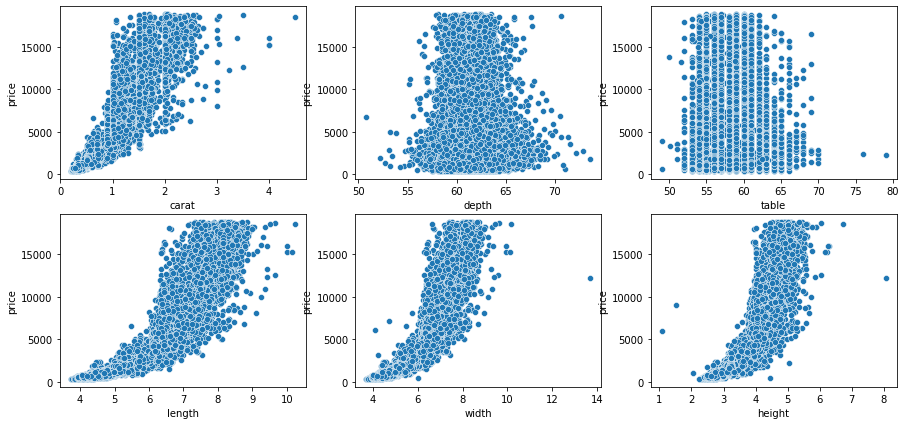

In [31]:
fig=plt.figure(figsize=[15,7])
for col in contCol:
  if col!="price":
    ax=plt.subplot(2,3,(contCol.index(col))+1)
    sns.scatterplot(x=col, y="price",data=data,ax=ax)


### **Observations**
Price is increasing exponentialy on increasing carat, length, width, and height

### **Checking Avg Price based on Cut, Color and Clarity**

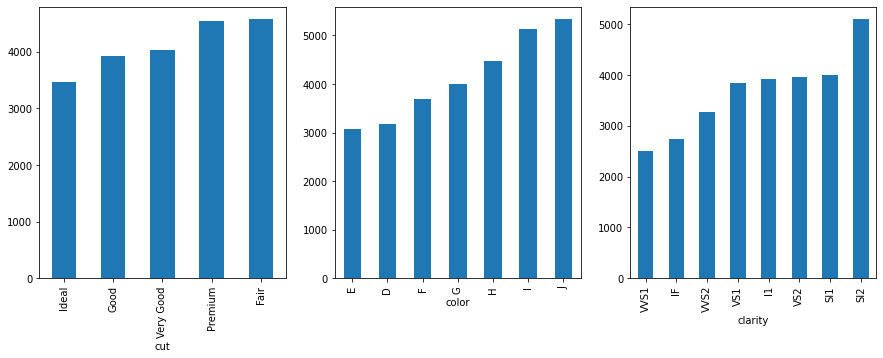

In [32]:
figure=plt.figure(figsize=[15,5])
for col in catCol:
  plt.subplot(1,3,catCol.index(col)+1)
  data.groupby(col)["price"].mean().sort_values().plot.bar()

### **Carat vs Color vs Price**

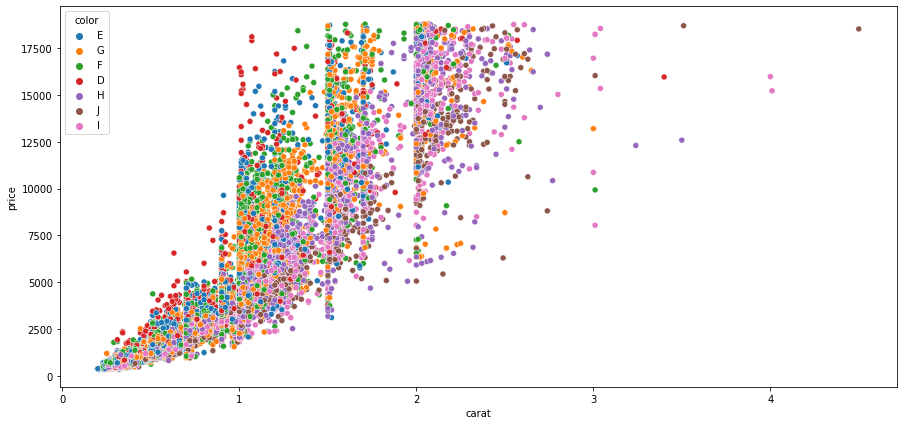

In [33]:
fig=plt.figure(figsize=[15,7])
sns.scatterplot(x="carat",y="price", hue="color", data=data)


### **Observations**
with increase in carat, best color dimonds are limited in numbers

### **Carat vs Clarity vs Price**

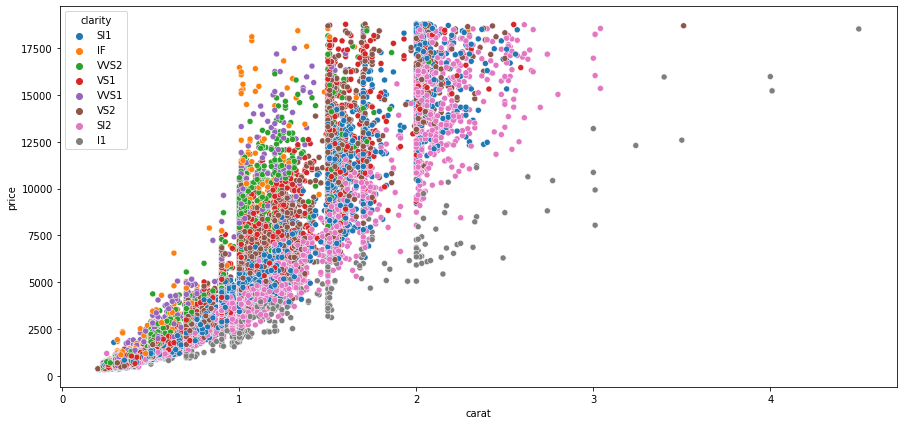

In [34]:
fig=plt.figure(figsize=[15,7])
sns.scatterplot(x="carat",y="price", hue="clarity", data=data)


### **Observations**
with increase in carat, best clarity dimonds are limited in numbers

### **Carat vs Cut vs Price**

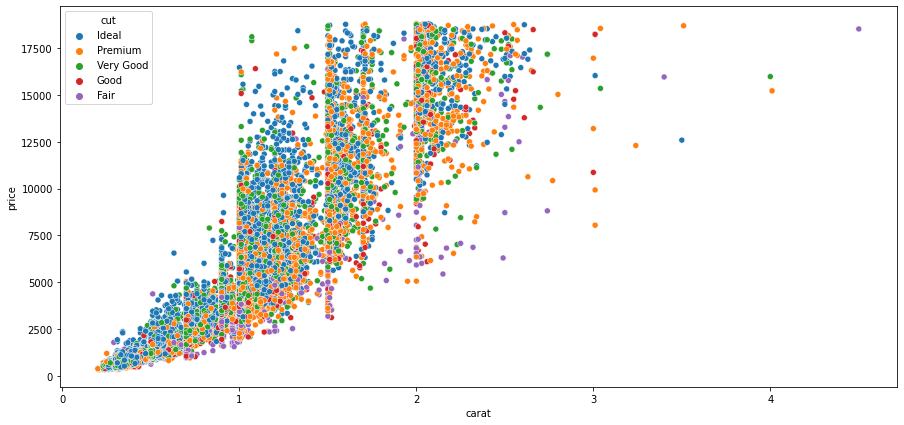

In [35]:
fig=plt.figure(figsize=[15,7])
sns.scatterplot(x="carat",y="price", hue="cut", data=data)


### **Observations**
with increase in carat, best cut dimonds are limited in numbers

## **Check impact on price based on color and clarity**

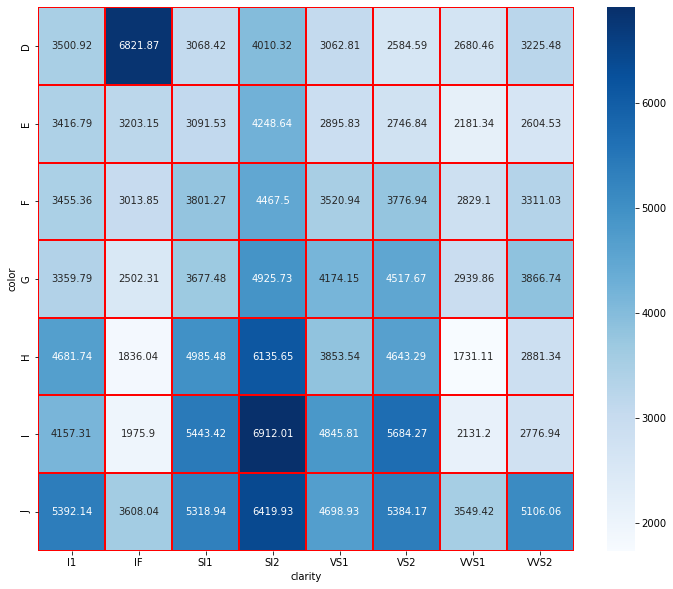

In [36]:
figure = plt.figure(figsize=[12, 10])
data1=data.groupby(["color","clarity"])["price"].mean().unstack()
p1=sns.heatmap(data=data1, annot=True, cmap='Blues', fmt='g',linewidth=1, linecolor='Red')

### **Observation**
D color diamond with IF clarity and I color diamon and SI2 clarity are sold at max price on an average

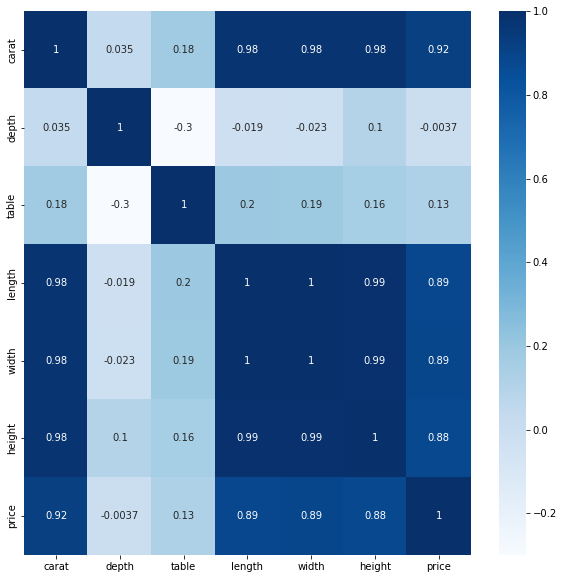

In [37]:
figure=plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor="Red")


### **Observations**
1. carat, width and height are having maximum impact on price 
2. width, height, length and carat are strongly corelated

# **7. Data Post-Processing**

### **7.1 Data Preparation**

In [38]:
features=["carat","cut","color","clarity","depth","table"]
X=data[features]
y=data["price"]
print(X.shape, y.shape)

(26925, 6) (26925,)


# **Model Development and Evaluation**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import KFold
# Define which columns should be scaled
columns_to_scale=["carat","depth","table"]
columns_to_encode=["cut","color","clarity"]
kf=KFold(8,shuffle=True,random_state=1)

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale),(OneHotEncoder(drop="first"),columns_to_encode))

mdlList=[DecisionTreeRegressor(),RandomForestRegressor(),
         BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=30),
         GradientBoostingRegressor(learning_rate=.1,subsample=.7)]
        #  VotingRegressor([("rf",RandomForestRegressor()),("bg",BaggingRegressor()),
        #                                     ("ada",AdaBoostRegressor()),("grad",GradientBoostingRegressor())])]
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for mdl in mdlList:
  # Make Pipeline
  pipe=make_pipeline(column_trans,mdl)
  cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring="r2",return_train_score=True)
  cv_score_df=pd.DataFrame(cv_score)
  score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                   "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
  
score_df



,ModelName,TrainScore,TestScore
0,DecisionTreeRegressor(),0.999889,0.952738
1,RandomForestRegressor(),0.996092,0.972785
2,BaggingRegressor(base_estimator=DecisionTreeRe...,0.995629,0.972521
3,GradientBoostingRegressor(subsample=0.7),0.956085,0.952923


Gradient boost model shows minimum variance amomng all models